# Análisis de Sentimientos

Author : Axel Daniel Malváez Flores  
Version : 2.0.0

Este notebook contiene el código para el análisis de sentimientos de los cursos dentro de la plataforma de FAAM.

In [1]:
# Main libraries we will use to make the preprocessing and the
# sentiment analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from unidecode import unidecode
from deep_translator import GoogleTranslator

sns.set_style('darkgrid')

## Preprocesamiento

La siguiente tabla contiene todas las opiniones que necesitamos; sin embargo, esta tabla tiene tres campos: nombres, título de la opinión y la opinión en sí, por lo que solo obtendremos las opiniones.

In [2]:
opinions = pd.read_excel('../Data/Curso1.xlsx', sheet_name = 'Opiniones')
opinions

,OPINIONES
0,Reyna María del Carmen Ledezma Uribe
1,Curso de Higiene de Manos
2,"Esta muy completo, con profesionales muy capac..."
3,Victor Toxqui Tlachino
4,Higiene de manos
...,...
2359,CURSO DE LAVADO DE MANOS
2360,"EXCELENTE CURSO, CONFUSO EL EXAMEN FINAL, RECO..."
2361,Celyzeth Puentes Aguilar
2362,Higiene De Manos


Sabemos que las opiniones se encuentran cada tres filas, por lo que obtendremos las opiniones tomando cada conjunto de tres filas.

In [3]:
number_ops = [2+(3*x) for x in range(788)]

opinions_only = list([opinions.iloc[x]['OPINIONES'] for x in number_ops])
print(f'Number of opinions: {len(opinions_only)}')

Number of opinions: 788


## Cleaning

In [4]:
def quitar_caracteres_especiales(texto):
    # Utiliza una expresión regular para eliminar caracteres especiales excepto los acentos
    texto_limpio = re.sub(r'[^a-zA-Z\sáéíóúñ]', '', texto)
    return texto_limpio

def traducir(opinion):
    opinion_trad = GoogleTranslator(source='es', target='en').translate(opinion)
    opinion_trad = unidecode(opinion_trad)
    opinion_trad = opinion_trad.lower()
    opinion_trad = re.sub(r'[^\w\s]', '', opinion_trad)
    return opinion_trad

nltk.download('stopwords')
stop_words = stopwords.words('english')

def quitar_stops(texto, stop_words = stop_words):
    texto_limpio = ' '.join([word for word in texto.split() if word not in stop_words])
    return texto_limpio

In [5]:
opinions_only = [quitar_caracteres_especiales(str(x).strip().lower()) for x in opinions_only]
df = pd.DataFrame(opinions_only, columns = ['Opiniones'])
df[df['Opiniones'] == 'nan'] = np.nan
df[df['Opiniones'] == ''] = np.nan
df.dropna(inplace = True)
df.reset_index(drop = True, inplace = True)
df

,Opiniones
0,esta muy completo con profesionales muy capaci...
1,excelente curso impartido para los profesional...
2,gracias por contribuir a seguir actualizandono...
3,excelente curso para aprender yo confirmar nue...
4,uno pensaría que lo sabe todo sobre cómo y cuá...
...,...
746,muy interesante y buena forma de impartir el c...
747,excelente
748,es un curso que vale la pena
749,excelente curso confuso el examen final recons...


In [6]:
df_trad = df.applymap(traducir)
df_trad

,Opiniones
0,it is very complete with highly trained profes...
1,excellent course taught for health professiona...
2,thank you for helping to continue updating us ...
3,excellent course to learn and confirm our know...
4,you would think you know everything about how ...
...,...
746,very interesting and good way to impart knowledge
747,excellent
748,it is a worthwhile course
749,excellent course confusing final exam reconsid...


In [7]:
df_cleaned = df_trad.applymap(quitar_stops)
df_cleaned

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielmalvaez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielmalvaez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielmalvaez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielmalvaez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielmalvaez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielmalvaez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielmalvaez/nltk_data...
[nltk

,Opiniones
0,very complete with highly trained professionals
1,excellent course taught for health professiona...
2,thank you for helping continue updating health...
3,excellent course learn and confirm our knowled...
4,you would think you know everything about how ...
...,...
746,very interesting and good way impart knowledge
747,excellent
748,worthwhile course
749,excellent course confusing final exam reconsid...


## Analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/danielmalvaez/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


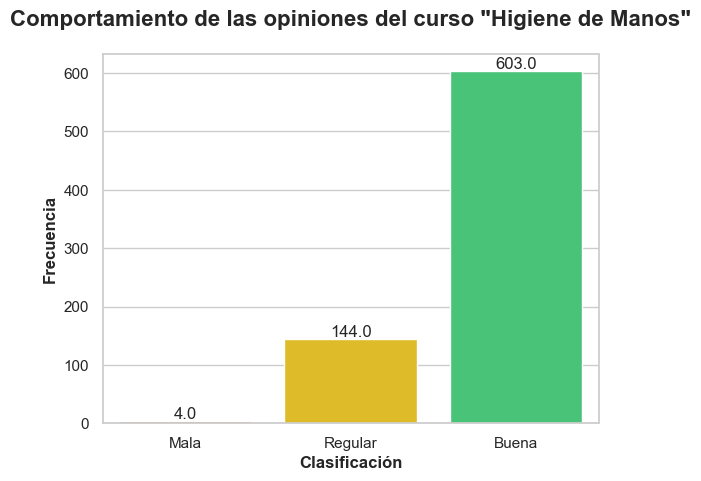

In [8]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

opinions_cleaned = df_cleaned['Opiniones'].tolist()

# Obtener los puntajes de polaridad de las reseñas
polarity_scores = [sia.polarity_scores(review)['compound'] for review in opinions_cleaned]

# Definir los límites y las etiquetas de los rangos
rangos = np.linspace(-1,1, 4)
etiquetas = ['Mala', 'Regular', 'Buena']

# Dividir los puntajes de polaridad en los rangos especificados
polarity_ranges = pd.cut(polarity_scores, bins=rangos, labels=etiquetas)

# Colores personalizados
colores = ['#FC540B', '#FCCD0B', '#35D773']

# Configurar el estilo y la paleta de colores
sns.set(style='whitegrid')
sns.set_palette(colores)

# Crear el countplot
ax = sns.countplot(x=polarity_ranges)

# Agregar los números en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Configurar los ejes y el título
plt.xlabel('Clasificación', fontweight='bold', labelpad=4, fontfamily='Arial')
plt.ylabel('Frecuencia', fontweight='bold', labelpad=4, fontfamily='Arial')
plt.title('Comportamiento de las opiniones del curso "Higiene de Manos"', fontsize=16, fontweight='bold', pad=20, loc='center', fontfamily='Arial')
#plt.yscale('log')

# Mostrar el gráfico
plt.savefig('Opiniones.png', dpi=300, bbox_inches='tight', format="png")
plt.show()

In [9]:
total_opiniones = len(df_cleaned)
opiniones_buena = polarity_ranges.value_counts()['Buena']
opiniones_regular = polarity_ranges.value_counts()['Regular']
opiniones_mala = polarity_ranges.value_counts()['Mala']

# Calificaciones en estrellas
calificacion_mala = 1
calificacion_regular = 3
calificacion_buena = 5

# Calcular el puntaje total
puntaje_total = (opiniones_mala * calificacion_mala) + (opiniones_regular * calificacion_regular) + (opiniones_buena * calificacion_buena)

# Mostrar el puntaje total
print(f"Puntaje Total: {puntaje_total / total_opiniones} estrellas")

Puntaje Total: 4.59520639147803 estrellas


## Creación del reporte

In [10]:
#!pip install reportlab

In [11]:
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet

nombre_curso = 'Higiene Manos'

# Create a PDF file
pdf_path = f"Reporte {nombre_curso}.pdf"
doc = SimpleDocTemplate(pdf_path, pagesize=letter)

# Create a list to hold the story (elements to be added to the PDF)
story = []

# Define styles
styles = getSampleStyleSheet()
normal_style = styles["Normal"]
title_style = styles["Title"]

# Add a title to the PDF
title = Paragraph(f"Reporte de Satisfacción del curso : {nombre_curso}", title_style)
story.append(title)
story.append(Spacer(1, 12))

# Add content to the PDF
content = """
This is a sample report generated with reportlab.
You can include text, images, and other elements in your report.
"""
content_paragraph = Paragraph(content, normal_style)
story.append(content_paragraph)
story.append(Spacer(1, 12))


original_width = 640
original_height = 480
scale_factor = 0.5

new_width = int(original_width * scale_factor)
new_height = int(original_height * scale_factor)

# Add an image to the PDF
image = Image("Opiniones.png", width=new_width, height=new_height)
story.append(image)

# Build the PDF
doc.build(story)

print(f"PDF generated at: {pdf_path}")

PDF generated at: Reporte Higiene Manos.pdf
